In [7]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('KaggleV2-May-2016.csv')

# Preview the first few rows
print(df.head())


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
print("Renamed Columns:", df.columns.tolist())


Renamed Columns: ['patientid', 'appointmentid', 'gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show']


In [11]:
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
dtype: int64


In [13]:
df.dropna(inplace=True)


In [15]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")


Removed 0 duplicate rows.


In [17]:
df['gender'] = df['gender'].str.strip().str.capitalize()  # e.g., "Male", "Female"

if 'neighbourhood' in df.columns:
    df['neighbourhood'] = df['neighbourhood'].str.title()


In [19]:
df['scheduledday'] = pd.to_datetime(df['scheduledday']).dt.strftime('%d-%m-%Y')
df['appointmentday'] = pd.to_datetime(df['appointmentday']).dt.strftime('%d-%m-%Y')


In [21]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Convert invalid to NaN
df['age'].fillna(0, inplace=True)  # Fill NaNs with 0
df['age'] = df['age'].astype(int)


C:\Users\hvs22\AppData\Local\Temp\ipykernel_11216\4137284339.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(0, inplace=True)  # Fill NaNs with 0


In [23]:
df = df[(df['age'] >= 0) & (df['age'] <= 100)]


In [25]:
# Convert back to datetime for calculations
df['scheduledday'] = pd.to_datetime(df['scheduledday'], dayfirst=True)
df['appointmentday'] = pd.to_datetime(df['appointmentday'], dayfirst=True)

# Calculate waiting days
df['waiting_days'] = (df['appointmentday'] - df['scheduledday']).dt.days
df['waiting_days'] = df['waiting_days'].apply(lambda x: max(x, 0))  # No negative waiting


In [27]:
df.reset_index(drop=True, inplace=True)
df.to_csv('Advanced_Cleaned_KaggleV2-May-2016.csv', index=False)
print("Cleaned dataset saved as 'Advanced_Cleaned_KaggleV2-May-2016.csv'")


Cleaned dataset saved as 'Advanced_Cleaned_KaggleV2-May-2016.csv'


C:\Users\hvs22\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


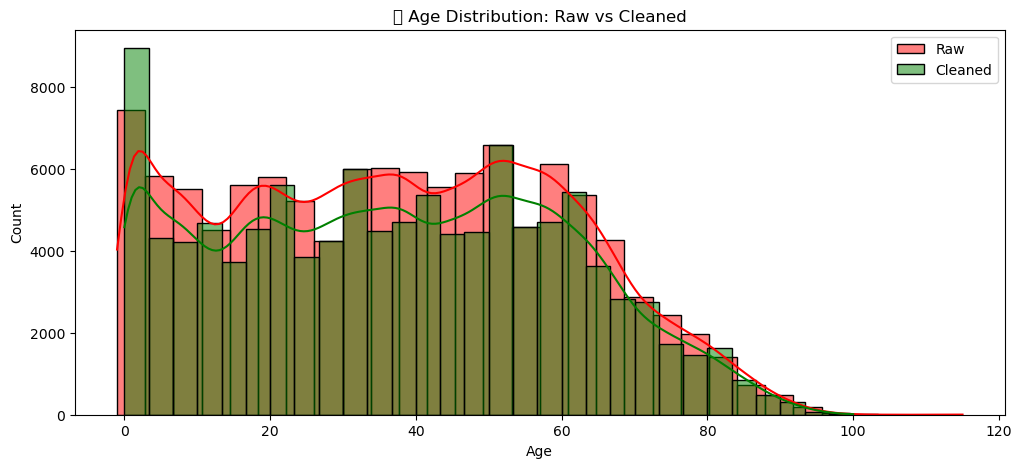

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load both datasets
raw = pd.read_csv("KaggleV2-May-2016.csv")
cleaned = pd.read_csv("Advanced_Cleaned_KaggleV2-May-2016.csv")

# Plot Age Distribution Comparison
plt.figure(figsize=(12, 5))
sns.histplot(raw['Age'], color='red', label='Raw', kde=True, bins=30)
sns.histplot(cleaned['age'], color='green', label='Cleaned', kde=True, bins=30)
plt.title("📊 Age Distribution: Raw vs Cleaned")
plt.legend()
plt.show()
